In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

In [12]:
df=pd.read_csv('../data/hottest_all.csv')

In [13]:
df.drop(columns=["Unnamed: 0"])
df.head()

,ID,Name,Album,Artist,Release_date,Length,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Time_signature
0,0,Hoops,Hoops,The Rubens,2015-10-23,158946,0,0.248000,0.738,0.517,0.000023,0.4680,-5.820,0.0321,96.037,4
1,1,King Kunta,To Pimp A Butterfly,Kendrick Lamar,2015-03-16,234693,72,0.005890,0.884,0.657,0.000000,0.1540,-4.569,0.0977,107.059,4
2,2,Lean On (feat. MØ & DJ Snake),Peace Is The Mission,Major Lazer,2015-06-01,176561,0,0.003460,0.723,0.809,0.001230,0.5650,-3.081,0.0625,98.007,4
3,3,The Less I Know The Better,Currents,Tame Impala,2015-07-17,216320,83,0.011500,0.640,0.740,0.006780,0.1670,-4.083,0.0284,116.879,4
4,4,Let It Happen,Currents,Tame Impala,2015-07-17,467586,74,0.004620,0.602,0.881,0.026600,0.1110,-5.875,0.0443,125.012,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,95,Heavy Weather,Heavy Weather,The Rubens,2020-04-22,205096,45,0.344000,0.623,0.890,0.000000,0.2200,-3.703,0.0372,89.988,4
589,96,Teardrops,POST HUMAN: SURVIVAL HORROR,Bring Me The Horizon,2020-10-30,215003,69,0.000323,0.497,0.916,0.000000,0.3600,-3.323,0.1080,96.051,4
590,97,Every Day Is A Holiday,Every Day Is A Holiday,DOPE LEMON,2020-07-31,353211,57,0.391000,0.530,0.566,0.002250,0.1960,-9.027,0.1970,180.007,4
591,98,SEND IT!,SEND IT!,Hooligan Hefs,2020-11-19,151730,68,0.410000,0.963,0.934,0.000014,0.1330,-2.239,0.2100,130.044,4


,Unnamed: 0,ID,Name,Album,Artist,Release_date,Length,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Time_signature
0,0,0,Hoops,Hoops,The Rubens,2015-10-23,158946,0,0.24800,0.738,0.517,0.000023,0.468,-5.820,0.0321,96.037,4
1,1,1,King Kunta,To Pimp A Butterfly,Kendrick Lamar,2015-03-16,234693,72,0.00589,0.884,0.657,0.000000,0.154,-4.569,0.0977,107.059,4
2,2,2,Lean On (feat. MØ & DJ Snake),Peace Is The Mission,Major Lazer,2015-06-01,176561,0,0.00346,0.723,0.809,0.001230,0.565,-3.081,0.0625,98.007,4
3,3,3,The Less I Know The Better,Currents,Tame Impala,2015-07-17,216320,83,0.01150,0.640,0.740,0.006780,0.167,-4.083,0.0284,116.879,4
4,4,4,Let It Happen,Currents,Tame Impala,2015-07-17,467586,74,0.00462,0.602,0.881,0.026600,0.111,-5.875,0.0443,125.012,4


In [14]:
#check for nulls
df.isnull().any()

Unnamed: 0          False
ID                  False
Name                False
Album               False
Artist              False
Release_date        False
Length              False
Popularity          False
Acousticness        False
Danceability        False
Energy              False
Instrumentalness    False
Liveness            False
Loudness            False
Speechiness         False
Tempo               False
Time_signature      False
dtype: bool

In [15]:
#top 5's
df['Artist'].value_counts().head()
df['Tempo'].value_counts().head()

Billie Eilish    12
Tame Impala      10
Lime Cordiale    10
Flume            10
Ocean Alley       9
Name: Artist, dtype: int64

124.019    2
103.989    2
115.026    2
94.025     2
120.972    2
Name: Tempo, dtype: int64

<Figure size 1152x360 with 0 Axes>

<AxesSubplot:>

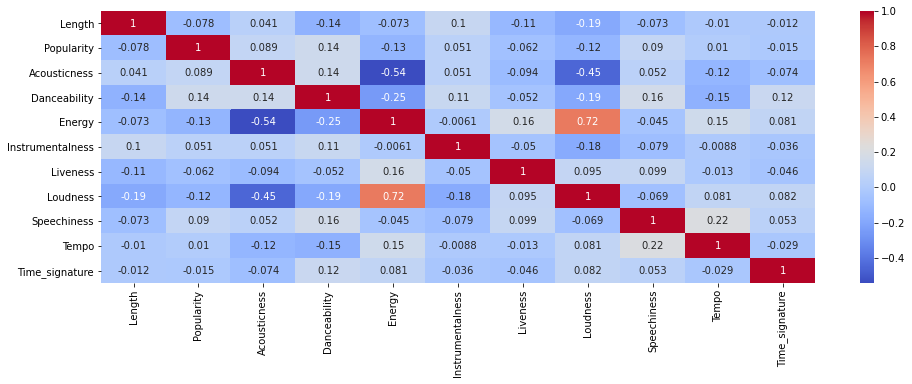

In [19]:
#heatmap
heatmap_df = df.drop(['ID','Name','Album','Artist','Release_date','Unnamed: 0'], axis=1)
plt.figure(figsize = (16,5))
sns.heatmap(heatmap_df.corr(), cmap="coolwarm", annot=True)
plt.show()